In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm, datasets
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA

In [2]:
# PARTIE 1
iris = pd.read_csv("../../datasets/iris.csv")
df = iris

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
iris.shape

(150, 5)

In [5]:
class_labels = iris["species"].unique()

In [6]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
y = df['species']

X = df.drop('species', axis=1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [11]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (105, 4)
X_test: (45, 4)
y_train: (105,)
y_test: (45,)


In [12]:
clf = svm.SVC(kernel ='linear', C = 0.05, gamma='auto')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Accuracy: Accuracy = Total number of predictions / Number of correct predictions

Confusion matrix: A table that shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class. You can use a markdown table to display it, like this:

|             | Predicted Positive | Predicted Negative |
|-------------|--------------------|--------------------|
| Actual Positive | TP                 | FN                 |
| Actual Negative | FP                 | TN                 |

Precision: Precision = TP / (TP + FP)

Recall: Recall = TP / (TP + FN)

F1-score: F1-score = 2 * Precision * Recall / (Precision + Recall)

Log-loss: Log-loss = -1/N * Σ [yi * log(y^i) + (1 - yi) * log(1 - y^i)]

AUC-ROC: The area under the curve of the receiver operating characteristic (ROC), which plots the true positive rate (TPR) against the false positive rate (FPR) for different threshold values


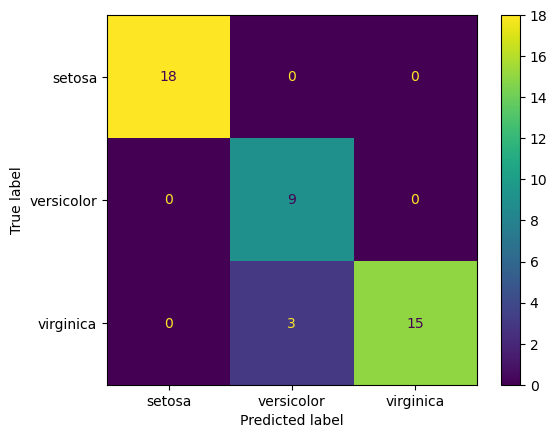

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.75      1.00      0.86         9
   virginica       1.00      0.83      0.91        18

    accuracy                           0.93        45
   macro avg       0.92      0.94      0.92        45
weighted avg       0.95      0.93      0.94        45



In [13]:
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred))

In [14]:
param_grid = {
    'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'gamma': [0.0001, 0.001, 0.01, 0.1, 'auto']
}

grid = GridSearchCV(
            svm.SVC(kernel='linear', C=0.05, gamma='auto'), 
            param_grid, 
            cv=5
        )

grid.fit(X_train, y_train)

best_model = grid.best_estimator_

print("les meilleur parametre sont :",grid.best_params_)

les meilleur parametre sont : {'C': 0.1, 'gamma': 0.0001}


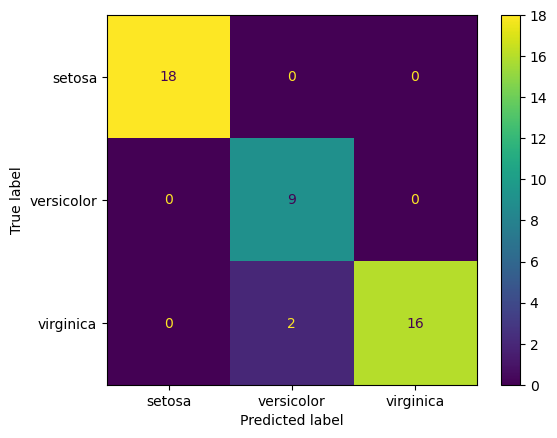

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.82      1.00      0.90         9
   virginica       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.94      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45

l'accuracy du model est de : 95.55555555555556


In [15]:
y_pred_best = best_model.predict(X_test)
cm_best = confusion_matrix(y_test, y_pred_best, labels=class_labels)
color = 'blue'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=class_labels)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_best))
accuracy = best_model.score(X_test, y_test)
print("l'accuracy du model est de :",accuracy*100)

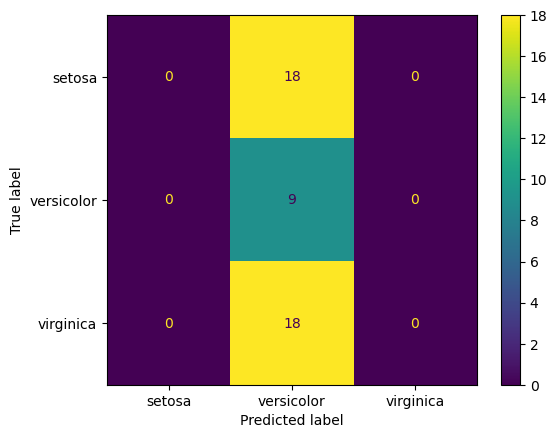

              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        18
  versicolor       0.20      1.00      0.33         9
   virginica       0.00      0.00      0.00        18

    accuracy                           0.20        45
   macro avg       0.07      0.33      0.11        45
weighted avg       0.04      0.20      0.07        45



C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# PARTIE 2 : RBF KERNEL
clf_rbf = svm.SVC(kernel ='rbf', C = 0.006, gamma='scale')
clf_rbf.fit(X_train, y_train)
y_pred_rbf = clf_rbf.predict(X_test)

cm_rbf = confusion_matrix(y_test, y_pred_rbf, labels=class_labels)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf, display_labels=class_labels)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_rbf))

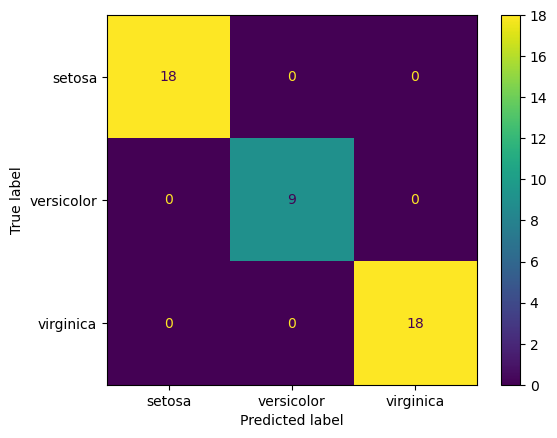

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [17]:
param_grid = {
    'C': np.logspace(-2, 10, 13),
    'gamma': np.logspace(-9, 3, 13)
}

grid = GridSearchCV(
            svm.SVC(kernel ='rbf', C = 0.006, gamma='scale'), 
            param_grid, 
            cv=5
        )

grid.fit(X_train, y_train)

best_model_rbf = grid.best_estimator_

y_pred_rbf_best = best_model_rbf.predict(X_test)
cm_rbf_best = confusion_matrix(y_test, y_pred_rbf_best, labels=class_labels)
color = 'blue'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rbf_best, display_labels=class_labels)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_rbf_best))

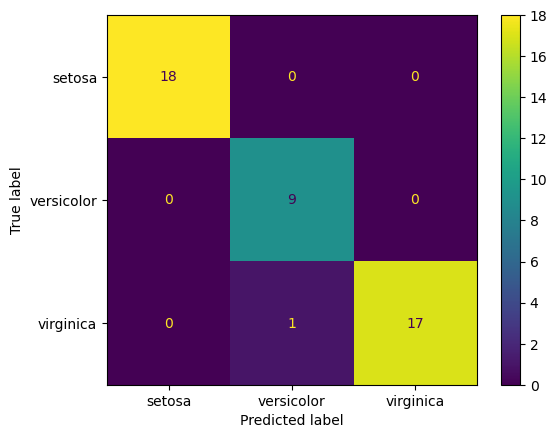

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [18]:
# PARTIE 2 : Kernell Poly
clf_poly = svm.SVC( kernel="poly", C=1, gamma="auto", degree=7 )
clf_poly.fit(X_train, y_train)
y_pred_poly = clf_poly.predict(X_test)

cm_poly = confusion_matrix(y_test, y_pred_poly, labels=class_labels)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly, display_labels=class_labels)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_poly))

C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1014 fits failed out of a total of 1092.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\LEGION\anaconda3\Lib\site-

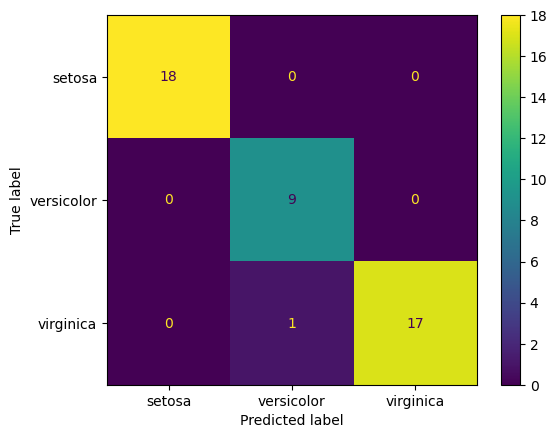

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        18
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



In [19]:
param_grid = {
    'C': np.logspace(-2, 10, 13),
    'gamma': np.append(np.logspace(-9, 3, 13), "auto")
}

grid = GridSearchCV(
            svm.SVC(  kernel="poly", C=1, gamma="auto", degree=7 ), 
            param_grid, 
            cv=6
        )

grid.fit(X_train, y_train)

best_model_poly = grid.best_estimator_

y_pred_poly_best = best_model_poly.predict(X_test)
cm_poly_best = confusion_matrix(y_test, y_pred_poly_best, labels=class_labels)
color = 'White'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly_best, display_labels=class_labels)
disp.plot()
plt.show()
print(classification_report(y_test, y_pred_poly_best))

In [3]:
# PARTIE 3
breast_cancer_data = datasets.load_breast_cancer()

breast_cancer_df = pd.DataFrame(
    data = breast_cancer_data.data,
    columns = breast_cancer_data.feature_names,
)

breast_cancer_df['target'] = breast_cancer_data.target

In [4]:
breast_cancer_df.shape

(569, 31)

In [5]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [4]:
y_cancer = breast_cancer_df['target']
X_cancer = breast_cancer_df.drop('target', axis=1)

pca = PCA(n_components=3)
pca.fit(X_cancer)
X_pca = pca.transform(X_cancer)

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(
    X_pca, 
    y_cancer, 
    test_size = 0.3, 
    random_state= 11
)

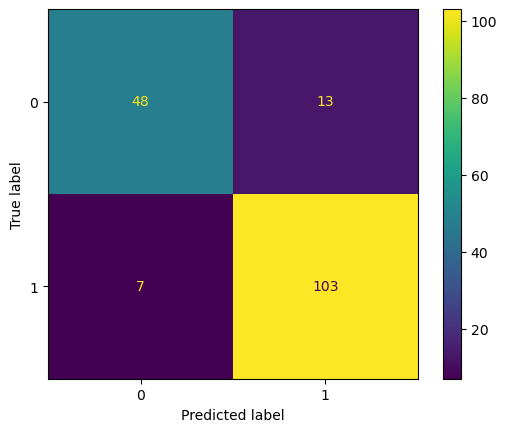

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        61
           1       0.89      0.94      0.91       110

    accuracy                           0.88       171
   macro avg       0.88      0.86      0.87       171
weighted avg       0.88      0.88      0.88       171




In [5]:
clf_poly_cancer = svm.SVC( kernel="poly", C=1, gamma="auto", degree=7 )
clf_poly_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_poly_best_cancer = clf_poly_cancer.predict(X_test_cancer)
cm_poly_best_cancer = confusion_matrix( y_test_cancer, y_pred_poly_best_cancer,)
color = 'White'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly_best_cancer)
disp.plot()
plt.show()
print(classification_report(y_test_cancer, y_pred_poly_best_cancer))
print()

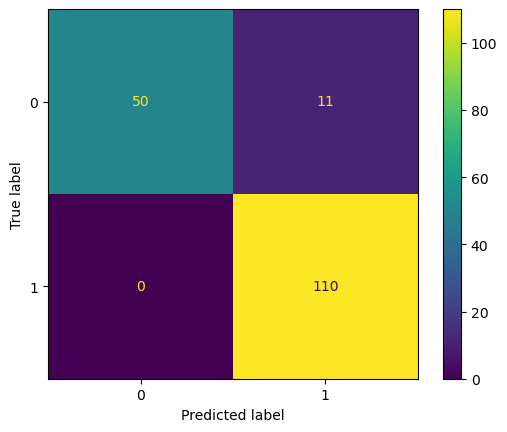

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        61
           1       0.91      1.00      0.95       110

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171




In [6]:
clf_poly_cancer = svm.SVC( kernel='linear', C=0.05, gamma='auto' )
clf_poly_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_poly_best_cancer = clf_poly_cancer.predict(X_test_cancer)
cm_poly_best_cancer = confusion_matrix( y_test_cancer, y_pred_poly_best_cancer,)
color = 'White'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly_best_cancer)
disp.plot()
plt.show()
print(classification_report(y_test_cancer, y_pred_poly_best_cancer))
print()

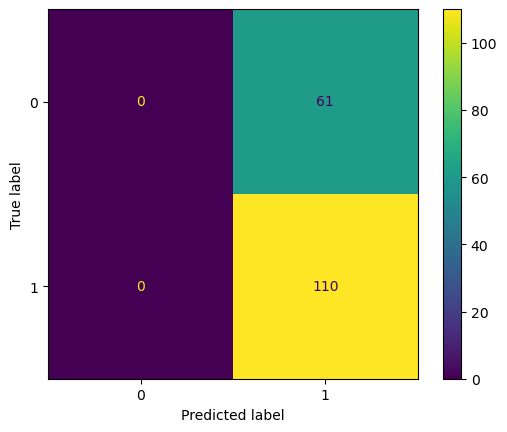

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.64      1.00      0.78       110

    accuracy                           0.64       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.41      0.64      0.50       171




C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
clf_poly_cancer = svm.SVC( kernel ='rbf', C = 0.006, gamma='auto' )
clf_poly_cancer.fit(X_train_cancer, y_train_cancer)
y_pred_poly_best_cancer = clf_poly_cancer.predict(X_test_cancer)
cm_poly_best_cancer = confusion_matrix( y_test_cancer, y_pred_poly_best_cancer,)
color = 'White'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly_best_cancer)
disp.plot()
plt.show()
print(classification_report(y_test_cancer, y_pred_poly_best_cancer))
print()

In [8]:
param_grid = { 
     'C': [ 1, 2],
     'gamma': ["auto", "scale"]
}

grid = GridSearchCV(
            svm.SVC(  kernel="poly", C=1, gamma="auto", degree=7 ), 
            param_grid, 
            cv=4
        )

grid.fit(X_train_cancer, y_train_cancer)

best_model_poly = grid.best_estimator_


y_pred_poly_best_cancer = best_model_poly.predict(X_test_cancer)
cm_poly_best_cancer = confusion_matrix( y_test_cancer, y_pred_poly_best_cancer)
color = 'White'
disp = ConfusionMatrixDisplay(confusion_matrix=cm_poly_best_cancer)
disp.plot()
plt.show()
print(classification_report(y_test_cancer, y_pred_poly_best_cancer))

In [5]:
# EXERCICE 1
X, Y = datasets.make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=15, shuffle=True)

print(X)
print(Y)

[[-0.49201692]
 [ 0.0956727 ]
 [-0.48965489]
 [ 0.82909859]
 [ 1.78970754]
 [-0.03062189]
 [ 1.59522993]
 [ 1.66768752]
 [ 0.14595623]
 [ 0.3050038 ]
 [ 1.3761214 ]
 [ 0.3544484 ]
 [-1.14632761]
 [-0.50704475]
 [ 0.76730857]
 [-0.21653587]
 [ 2.21564334]
 [ 1.05739559]
 [ 0.7299339 ]
 [-0.53465509]
 [ 0.45645302]
 [-0.54559232]
 [ 0.98356858]
 [-0.25314149]
 [-0.09275198]
 [ 0.61231938]
 [-0.42484686]
 [-1.59434985]
 [ 0.24947376]
 [ 0.21299256]
 [-0.82520846]
 [-0.40155479]
 [ 0.86547948]
 [-0.31147409]
 [ 0.48176869]
 [ 1.34365092]
 [ 0.01247306]
 [ 0.19176078]
 [-0.96480586]
 [-0.5415748 ]
 [-1.36628474]
 [-0.67117696]
 [ 0.62784987]
 [-0.56648133]
 [ 0.62666211]
 [ 0.44958442]
 [ 0.01754306]
 [ 0.65189655]
 [ 0.151502  ]
 [-0.36070689]
 [-1.62715894]
 [ 0.04775021]
 [-1.05601469]
 [ 0.72681749]
 [-0.43030408]
 [ 0.24565448]
 [ 0.77412381]
 [-0.40057301]
 [ 0.38600546]
 [ 0.21596902]
 [ 0.05932719]
 [ 1.0726287 ]
 [-1.65611503]
 [-1.37862842]
 [-0.80820946]
 [-0.95499007]
 [-1.07083

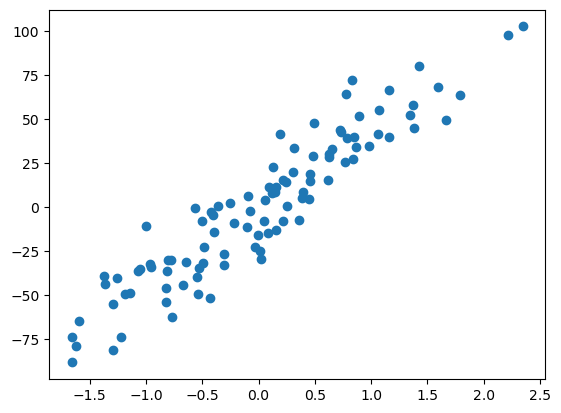

In [6]:
plt.scatter(X, Y)
plt.show()

In [7]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

import matplotlib.pyplot as plt 
  
  
class LinearRegression() :
    
    def __init__( self, learning_rate, iterations ) : 
        self.learning_rate = learning_rate 
        self.iterations = iterations 
          
    def fit( self, X, Y ) : 
        self.m, self.n = X.shape
        self.A = np.zeros( self.n ) 
        self.b = 0
        self.X = X 
        self.Y = Y 
        for i in range( self.iterations ) : 
            self.update_weights() 
              
        return self
      
      
    def update_weights( self ) : 
             
        Y_pred = self.predict( self.X ) 
          
        dA = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m 
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        self.A = self.A - self.learning_rate * dA 
        self.b = self.b - self.learning_rate * db 
        return self
      
      
    def predict( self, X ) : 
        return X.dot( self.A ) + self.b

Predicted values  [-23.33  13.03 -26.2 ]
Real values       [ -2.77881997   8.90723802 -22.43879961]
Trained W         44.31
Trained b         -4.51


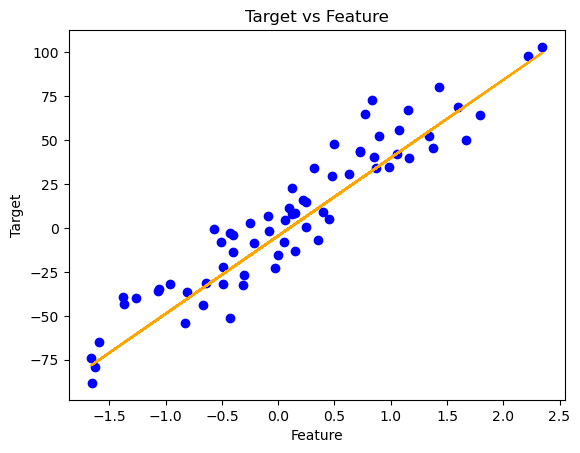

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 2/3, random_state = 0 ) 
             
model = LinearRegression( iterations = 100000, learning_rate = 0.001 ) 
  
model.fit( X_train, Y_train ) 
      
  
Y_pred = model.predict( X_test ) 
      
print( "Predicted values ", np.round( Y_pred[:3], 2 ) )  
print( "Real values      ", Y_test[:3] ) 
print( "Trained W        ", round( model.A[0], 2 ) )       
print( "Trained b        ", round( model.b, 2 ) ) 
      
      
plt.scatter( X_test, Y_test, color = 'blue' ) 
plt.plot( X_test, Y_pred, color = 'orange' ) 
plt.title( 'Target vs Feature' )
plt.xlabel( 'Feature' )
plt.ylabel( 'Target' )
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Mean Absolute Error:", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(Y_test, Y_pred)))
print("R-squared (R²) Score:", r2_score(Y_test, Y_pred))

Mean Absolute Error: 12.776846356449553
Mean Squared Error: 236.2825618850395
Root Mean Squared Error: 15.371485350643233
R-squared (R²) Score: 0.872262586339478
